In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ase.visualize import view
from ase.io import read

from skimage.io import imread, imsave
from skimage.draw import disk
from skimage.color import label2rgb

In [2]:
graphene = read('graphene_defects.poscar')

In [3]:
view(graphene)

<Popen: returncode: None args: ['/home/anamendonca/miniconda3/envs/ase_env/b...>

In [2]:
tem_img = imread('../computem_sim/graphene_defects.tif').T
tem_img.shape

(3840, 4434)

In [3]:
imsave('../images/graphene_defects.png',tem_img)

In [13]:
img_size = tem_img.shape
pixel_size = img_size / np.array([graphene.cell.array[0,0], graphene.cell.array[1,1]])
pixel_size

array([45.07042254, 45.06991362])

In [14]:
atoms_pixel_coords = np.rint(graphene.get_positions()[:,[0,1]] * pixel_size)

In [15]:
mask_img = np.ones((img_size[0],img_size[1], 1), dtype=int) * 0
mask_img.shape

(3840, 4434, 1)

In [ ]:
atomic_radii = .7 #raio atomico do carbono

mask_radius = (pixel_size[1] * atomic_radii)
mask_radius

np.float64(31.548939533640148)

In [17]:
for io in range(len(atoms_pixel_coords)):
    rr, cc = disk((int(atoms_pixel_coords[io,0]), int(atoms_pixel_coords[io,1])), mask_radius, shape=mask_img.shape)
    mask_img[rr, cc, :] = 1

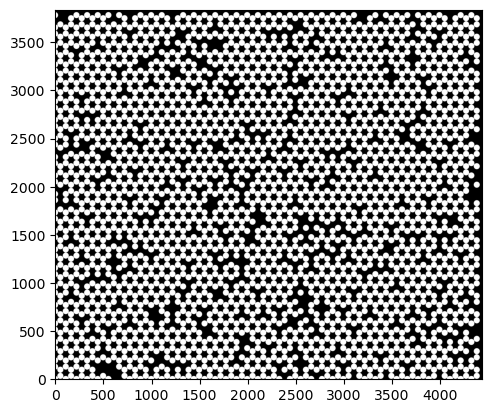

In [18]:
plt.imshow(mask_img,cmap='grey',origin='lower')

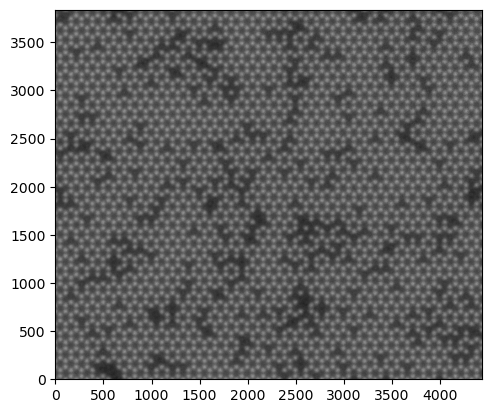

In [19]:
plt.imshow(tem_img,cmap='grey',origin='lower')

In [20]:
np.savez('graphene_supercell.npz', image = tem_img, label=mask_img)